In [104]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

y_train = data_train[:, 2][:, None]
y_test = data_test[:, 2][:, None]

In [108]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def f_pred(X, w):
    return sigmoid(X.dot(w))

def loss_logreg(y_pred,y, w, lda): 
    #n = len(y)
    #reg_term = (lda/2) * np.sum(w**2) 
    #loss = np.mean( (-y.T).dot(np.log(y_pred)) - (1-y).T.dot(np.log(1-y_pred + 1e-7)) ) + (lda/2) * np.sum(w**2)
    return np.mean( (-y.T).dot(np.log(y_pred)) - (1-y).T.dot(np.log(1-y_pred + 1e-7)) ) + (lda/2) * np.sum(w**2)
def grad_loss(y_pred, y, X, w, lda):
    #n = len(y)
    #reg_term = lda * w
    #grad = X.T.dot(y_pred - y) * 2 / len(y) + (lda * w)
    return X.T.dot(y_pred - y) * 2 / len(y) + (lda * w)

# gradient descent function definition
def grad_desc(X_train, X_test, y_train, y_test , w_init, tau, max_iter, lda):

    te_L_iters = np.zeros([max_iter]) # record the loss values
    tr_L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        tr_y_pred = f_pred(X_train, w) # linear predicition function
        te_y_pred = f_pred(X_test, w) # linear predicition function

        grad_f =  grad_loss(tr_y_pred, y_train, X_train, w, lda) # gradient of the loss
        
        tr_L_iters[i] = loss_logreg(tr_y_pred, y_train, w, lda)
        te_L_iters[i] = loss_logreg(te_y_pred, y_test, w, lda) # save the current loss value 
        
        w =  w - (tau * grad_f) # update rule of gradient descent  

    return w, tr_L_iters, te_L_iters

In [109]:
import random

X_train = np.ones([number_data_train, 100])
X_test = np.ones([number_data_test, 100])

for k in range(100):
    i = int(k / 10)
    j = k % 10
    X_train[:, k] = np.multiply(x1_train**i, x2_train**j)
    X_test[:, k] = np.multiply(x1_test**i, x2_test**j)
    
w_init = np.random.rand(100, 1).reshape(100,1)
tau = 3e-2
max_iter = 20000

In [111]:
#m1 : lambda = 0.00001
#m2 : lambda = 0.0001
#m3 : lambda = 0.001
#m4 : lambda = 0.01

train_w = [0, 0, 0, 0, 0]
train_L_iters = [0, 0, 0, 0, 0]
test_L_iters = [0, 0, 0, 0, 0]

for i in range(5):
    train_w[4-i], train_L_iters[4-i], test_L_iters[4-i] = grad_desc(X_train, X_test, y_train, y_test, w_init, tau, max_iter, 0.1*(0.1**i))

[102.67085336 102.67066297 102.67047258 ...  93.92313155  93.92297049
  93.92280942]
[104.31920543 104.31894618 104.31868692 ...  92.58327055  92.58305831
  92.58284606]


1. Plot the training data

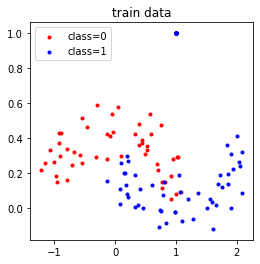

In [12]:
plt.figure(1, figsize = (4, 4))
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], c = 'red', marker = '.', label = 'class=0')
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], c = 'blue', marker = '.', label = 'class=1')
plt.title('train data')
plt.legend()
plt.show()

2. Plot the testing data

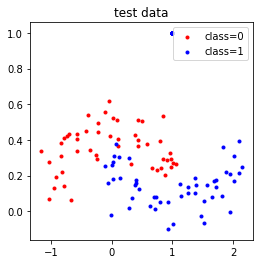

In [5]:
plt.figure(1, figsize = (4, 4))
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], c = 'red', marker = '.', label = 'class=0')
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], c = 'blue', marker = '.', label = 'class=1')
plt.title('test data')
plt.legend()
plt.show()

3. Plot the learning curve with lambda = 0.00001

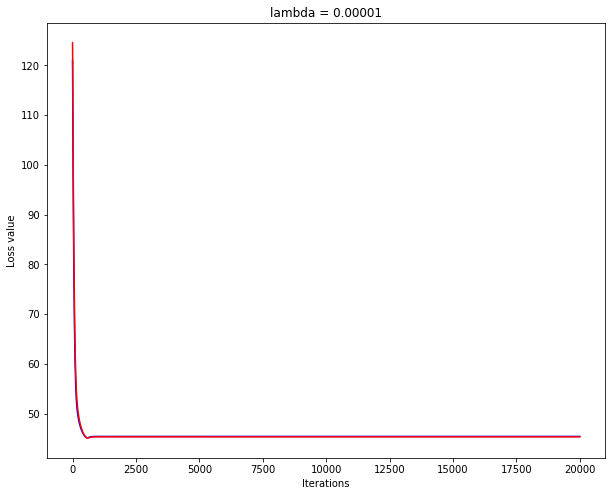

In [114]:
plt. figure(3, figsize=(10,8))
plt.plot(np.array(range(max_iter)), train_L_iters[4], c = 'blue', label = 'training')
plt.plot(np.array(range(max_iter)), test_L_iters[4], c = 'red', label = 'testing')
plt.title('lambda = 0.00001')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (30000,) and (50000,)

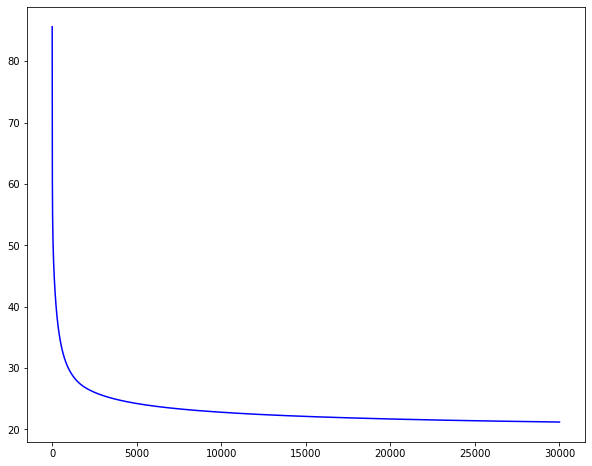

In [82]:
plt. figure(3, figsize=(10,8))
plt.plot(np.array(range(max_iter)), train_L_iter[1], c = 'blue', label = 'training')
plt.plot(np.array(range(max_iter)), test_L_iter_m2, c = 'red', label = 'testing')
plt.title('lambda = 0.00001')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (30000,) and (50000,)

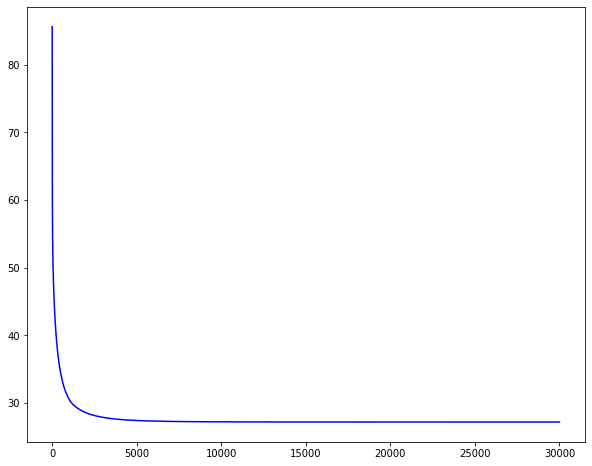

In [83]:
plt. figure(3, figsize=(10,8))
plt.plot(np.array(range(max_iter)), train_L_iter_m3, c = 'blue', label = 'training')
plt.plot(np.array(range(max_iter)), test_L_iter_m3, c = 'red', label = 'testing')
plt.title('lambda = 0.00001')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()